##VAR:

With the SARIMAX model, the relationship
is unidirectional: we assume that the exogenous variable has an impact on
the target only.
However, it is possible that two time series have a bidirectional relationship,
meaning that time series t1 is a predictor of time series t2, and time series t2 is also
a predictor for time series t1.

This brings us to the vector autoregression (VAR) model.

But what is VAR:

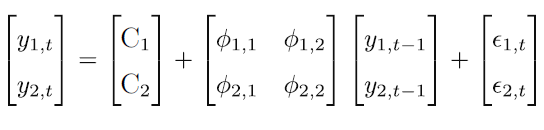

Which leads to:

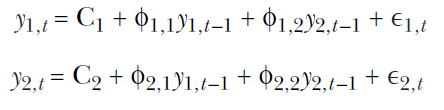

Here is the general format:

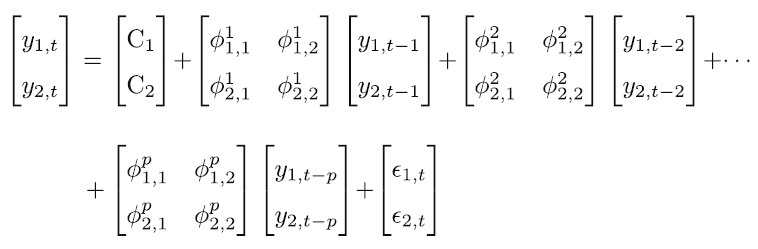

The VAR(p) model can be seen as a generalization of the AR(p) model that allows for
multiple time series. Just like in the AR(p) model, the order p of the VAR(p) model
determines how many lagged values impact the present value of a series. In this
model, however, we also include lagged values of other time series.

Note that the time series must be stationary to apply the VAR model.

The VAR(p) model is only valid if both series are useful in predicting one another. we
must apply the Granger causality test, which is a statistical hypothesis test to determine
whether one time series is predictive of another.Only upon the success of this test can
we apply the VAR model to make predictions. This is an important step in our modeling
procedure when using a VAR model.

The Granger Causality test requires both time serires to be stationary.

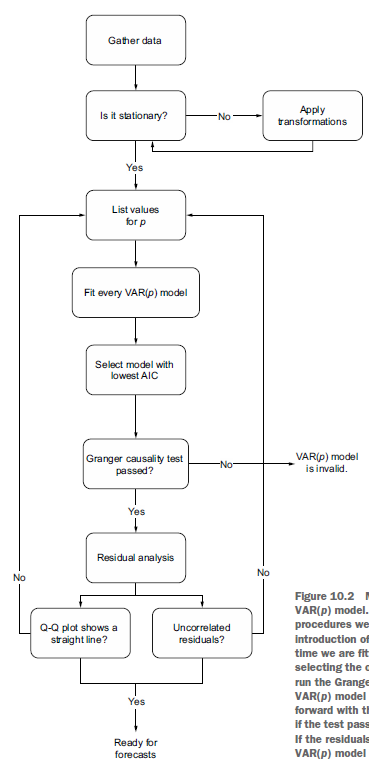

Also, the Granger causality test tests causality
only in one direction; we must repeat the test to verify that y1,t also Grangercauses
y2,t in order for the VAR model to be valid.
You saw that the Granger causality test is performed after the VAR(p) model is
selected. This is because the test requires us to specify the number of lags to include in
the test, which is equivalent to the order of the model.

In [2]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.varmax import VARMAX
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


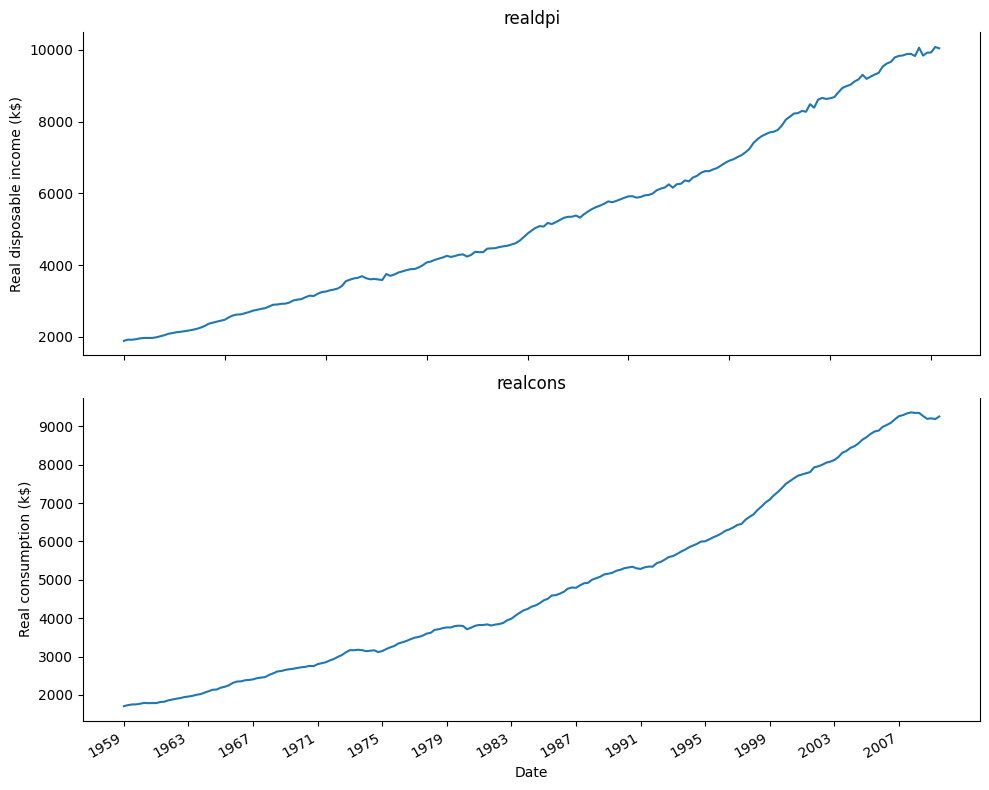

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
ax1.plot(macro_econ_data['realdpi'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Real disposable income (k$)')
ax1.set_title('realdpi')
ax1.spines['top'].set_alpha(0)
ax2.plot(macro_econ_data['realcons'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Real consumption (k$)')
ax2.set_title('realcons')
ax2.spines['top'].set_alpha(0)
plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))
fig.autofmt_xdate()
plt.tight_layout()

###ADF for Stationarity Checking:

In [5]:
ad_fuller_result_1 = adfuller(macro_econ_data['realdpi'])
print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')
print('\n---------------------\n')
ad_fuller_result_2 = adfuller(macro_econ_data['realcons'])
print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realdpi
ADF Statistic: 2.986025351954683
p-value: 1.0

---------------------

realcons
ADF Statistic: 1.549912338050964
p-value: 0.9976992503412904


###Transformation:

In [6]:
ad_fuller_result_1 = adfuller(macro_econ_data['realdpi'].diff()[1:])
print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')
print('\n---------------------\n')
ad_fuller_result_2 = adfuller(macro_econ_data['realcons'].diff()[1:])
print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realdpi
ADF Statistic: -8.864893340673007
p-value: 1.4493606159108096e-14

---------------------

realcons
ADF Statistic: -4.204306080845247
p-value: 0.0006479282158627571


###VAR Optimizer function

In [7]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.varmax import VARMAX
def optimize_VAR(endog: Union[pd.Series, list]) -> pd.DataFrame:
  results = []
  for i in tqdm_notebook(range(15)):
    try:
      model = VARMAX(endog, order=(i, 0)).fit(dips=False)
    except:
      continue
    aic = model.aic
    results.append([i, aic])
  result_df = pd.DataFrame(results)
  result_df.columns = ['p', 'AIC']
  result_df = result_df.sort_values(by='AIC',
                                    ascending=True).reset_index(drop=True)
  return result_df

In [8]:
endog = macro_econ_data[['realdpi', 'realcons']]
endog_diff = macro_econ_data[['realdpi', 'realcons']].diff()[1:]
train = endog_diff[:162]
test = endog_diff[162:]
result_df = optimize_VAR(train)
result_df

  0%|          | 0/15 [00:00<?, ?it/s]

,p,AIC
0,3,3123.070078
1,5,3123.708523
2,6,3126.855598
3,4,3129.194047
4,2,3130.091668
5,7,3133.398275
6,1,3134.333343
7,8,3137.149013
8,9,3140.367180
9,10,3147.838722


The best p here is equall to 3. Now we know we should have VAR(3), it is the time to perform Granger Causality test.

In [9]:
print('realcons Granger-causes realdpi?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_econ_data[['realdpi',
                                                   'realcons']].diff()[1:], [3])
print('\nrealdpi Granger-causes realcons?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_econ_data[['realcons',
                                                   'realdpi']].diff()[1:], [3])

realcons Granger-causes realdpi?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=28.7191 , p=0.0000  , df=3
likelihood ratio test: chi2=26.8268 , p=0.0000  , df=3
parameter F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3

realdpi Granger-causes realcons?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=8.7625  , p=0.0326  , df=3
likelihood ratio test: chi2=8.5751  , p=0.0355  , df=3
parameter F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3


Running the Granger causality test for both variables returns a p-value smaller than
0.05 in both cases. Therefore, we can reject the null hypothesis and conclude that
realdpi Granger-causes realcons, and realcons Granger-causes realdpi.

In [10]:
best_model = VARMAX(train, order=(3,0))
best_model_fit = best_model.fit(disp=False)

Let’s focus on the residuals for realdpi first.

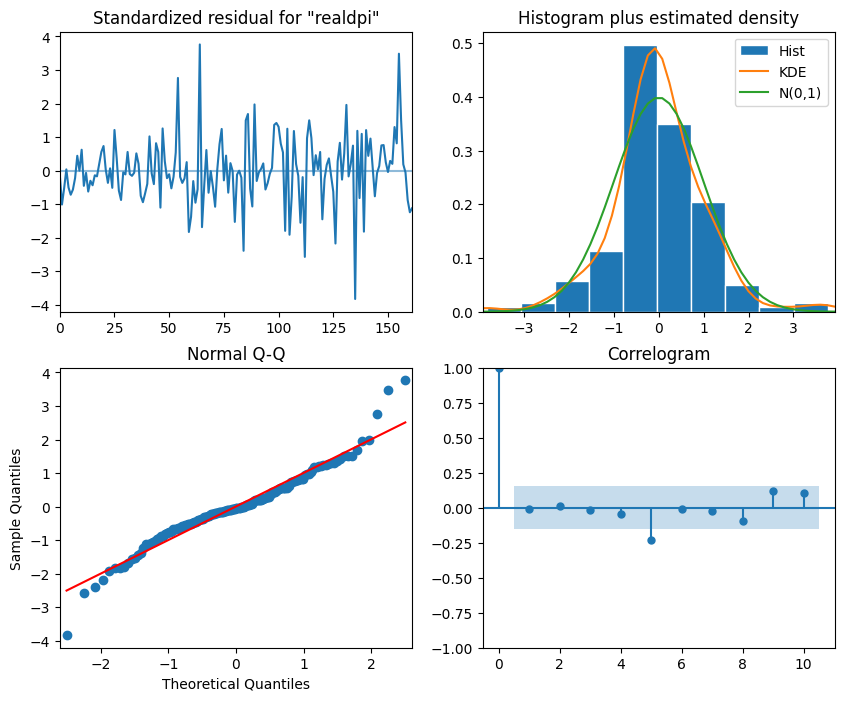

In [11]:
best_model_fit.plot_diagnostics(figsize=(10,8), variable=0);

Now we can move on to analyzing the residuals of realcons.

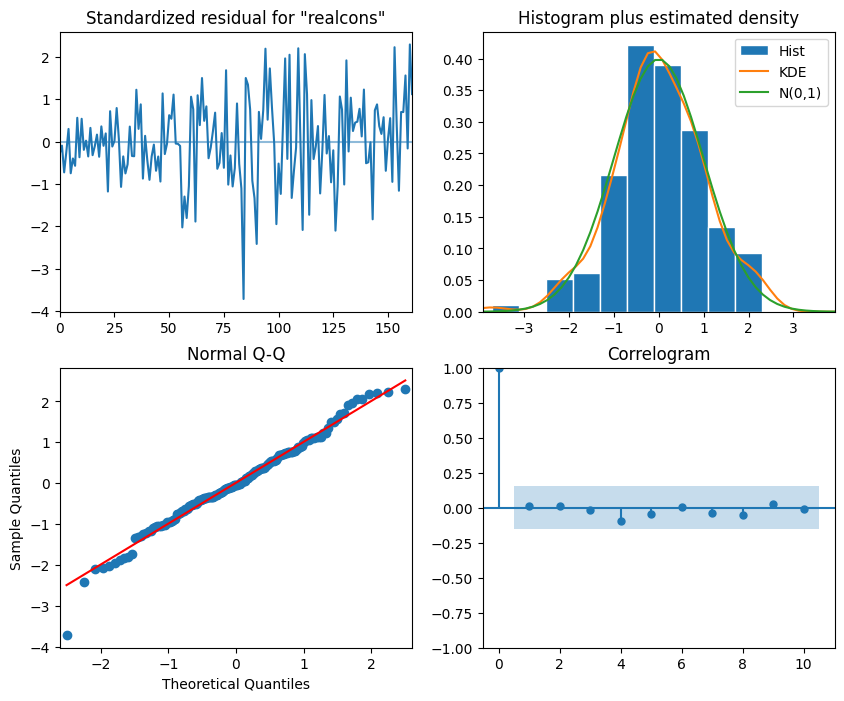

In [12]:
best_model_fit.plot_diagnostics(figsize=(10,8), variable=1);

In [13]:
realgdp_residuals = best_model_fit.resid['realdpi']
rdpi_df = acorr_ljungbox(realgdp_residuals, np.arange(1, 11, 1), return_df=True)
print(rdpi_df)

      lb_stat  lb_pvalue
1    0.011641   0.914079
2    0.029410   0.985403
3    0.075796   0.994575
4    0.378020   0.984237
5    9.142892   0.103499
6    9.165748   0.164469
7    9.270487   0.233815
8   10.812127   0.212573
9   13.318498   0.148716
10  15.287698   0.121920


Thus, we do not reject the null hypothesis, meaning that the residuals
are uncorrelated and independent, just like white noise.

In [14]:
realgdp_residuals = best_model_fit.resid['realcons']
rdpi_df = acorr_ljungbox(realgdp_residuals, np.arange(1, 11, 1), return_df=True)
print(rdpi_df)

     lb_stat  lb_pvalue
1   0.023757   0.877505
2   0.068698   0.966234
3   0.068777   0.995301
4   0.235628   0.993582
5   0.377556   0.995925
6   0.787230   0.992412
7   1.015086   0.994581
8   2.150240   0.976056
9   2.436944   0.982531
10  2.442617   0.991686


Again, we do not reject the null hypothesis, meaning that the
residuals are not correlated and independent, just like white noise.

In [15]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int,
                     window: int, method: str) -> list:
  total_len = train_len + horizon
  end_idx = train_len
  if method == 'VAR':
    realdpi_pred_VAR = []
    realcons_pred_VAR = []
    for i in range(train_len, total_len, window):
      model = VARMAX(df[:i], order=(3,0))
      res = model.fit(disp=False)
      predictions = res.get_prediction(0, i + window - 1)
      oos_pred_realdpi = predictions.predicted_mean.iloc[-window:]['realdpi']
      oos_pred_realcons = predictions.predicted_mean.iloc[-window:]['realcons']
      realdpi_pred_VAR.extend(oos_pred_realdpi)
      realcons_pred_VAR.extend(oos_pred_realcons)
    return realdpi_pred_VAR, realcons_pred_VAR
  elif method == 'last':
    realdpi_pred_last = []
    realcons_pred_last = []
    for i in range(train_len, total_len, window):
      realdpi_last = df[:i].iloc[-1]['realdpi']
      realcons_last = df[:i].iloc[-1]['realcons']
      realdpi_pred_last.extend(realdpi_last for _ in range(window))
      realcons_pred_last.extend(realcons_last for _ in range(window))
    return realdpi_pred_last, realcons_pred_last

In [17]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 4
realdpi_pred_VAR, realcons_pred_VAR = rolling_forecast(endog_diff, TRAIN_LEN, HORIZON, WINDOW, 'VAR')

In [18]:
test = endog[163:]
test['realdpi_pred_VAR'] = pd.Series()
test['realdpi_pred_VAR'] = endog.iloc[162]['realdpi'] + np.cumsum(realdpi_pred_VAR)
test['realcons_pred_VAR'] = pd.Series()
test['realcons_pred_VAR'] = endog.iloc[162]['realcons'] + np.cumsum(realcons_pred_VAR)
test

,realdpi,realcons,realdpi_pred_VAR,realcons_pred_VAR
163,7887.7,7389.2,7829.224941,7354.323079
164,8053.4,7501.3,7897.190077,7430.252000
165,8135.9,7571.8,7960.564871,7496.624306
166,8222.3,7645.9,8014.757071,7556.606726
167,8234.6,7713.5,8080.701763,7630.989437
168,8296.5,7744.3,8142.391377,7692.838219
169,8273.7,7773.5,8200.122120,7753.858671
170,8484.5,7807.7,8259.360845,7812.527390
171,8385.5,7930.0,8264.384832,7864.627994
172,8611.6,7957.3,8320.857168,7895.052746


In [20]:
realdpi_pred_last, realcons_pred_last = rolling_forecast(endog, TRAIN_LEN, HORIZON, WINDOW, 'last')
test['realdpi_pred_last'] = realdpi_pred_last
test['realcons_pred_last'] = realcons_pred_last
test

,realdpi,realcons,realdpi_pred_VAR,realcons_pred_VAR,realdpi_pred_last,realcons_pred_last
163,7887.7,7389.2,7829.224941,7354.323079,7716.0,7199.9
164,8053.4,7501.3,7897.190077,7430.252000,7716.0,7199.9
165,8135.9,7571.8,7960.564871,7496.624306,7716.0,7199.9
166,8222.3,7645.9,8014.757071,7556.606726,7716.0,7199.9
167,8234.6,7713.5,8080.701763,7630.989437,8135.9,7571.8
168,8296.5,7744.3,8142.391377,7692.838219,8135.9,7571.8
169,8273.7,7773.5,8200.122120,7753.858671,8135.9,7571.8
170,8484.5,7807.7,8259.360845,7812.527390,8135.9,7571.8
171,8385.5,7930.0,8264.384832,7864.627994,8273.7,7773.5
172,8611.6,7957.3,8320.857168,7895.052746,8273.7,7773.5


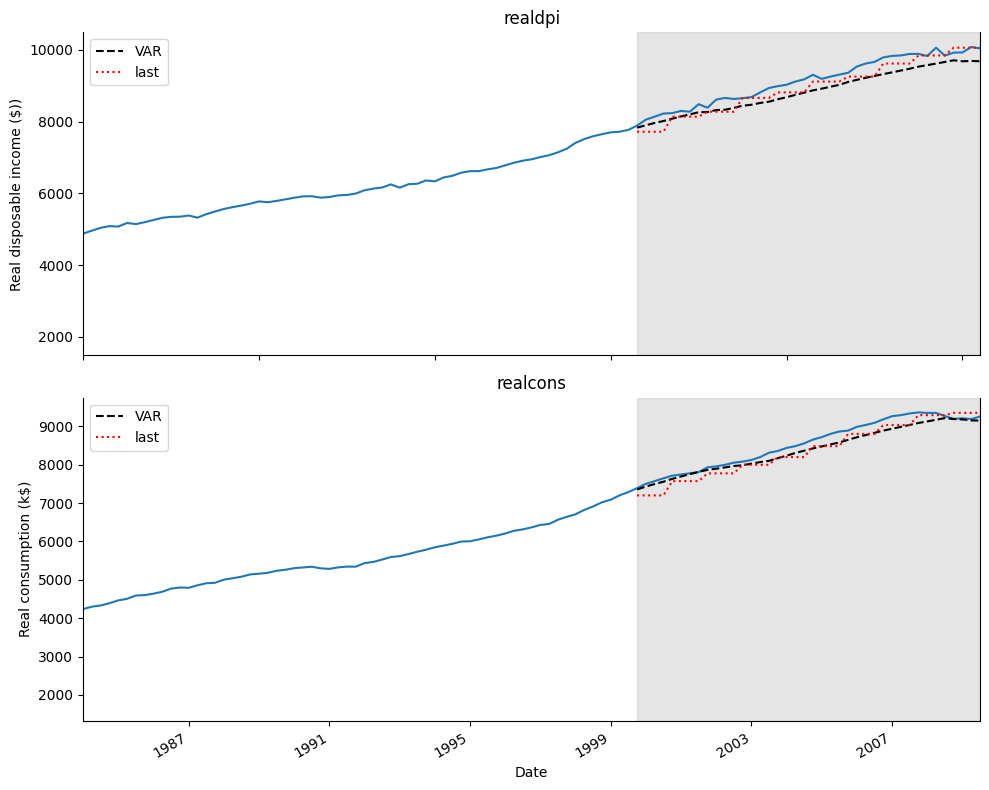

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

ax1.plot(macro_econ_data['realdpi'])
ax1.plot(test['realdpi_pred_VAR'], 'k--', label='VAR')
ax1.plot(test['realdpi_pred_last'], 'r:', label='last')
ax1.set_xlabel('Date')
ax1.set_ylabel('Real disposable income ($))')
ax1.set_title('realdpi')
ax1.spines['top'].set_alpha(0)
ax1.axvspan(163, 202, color='#808080', alpha=0.2)
ax1.set_xlim(100, 202)
ax1.legend(loc=2)

ax2.plot(macro_econ_data['realcons'])
ax2.plot(test['realcons_pred_VAR'], 'k--', label='VAR')
ax2.plot(test['realcons_pred_last'], 'r:', label='last')
ax2.set_xlabel('Date')
ax2.set_ylabel('Real consumption (k$)')
ax2.set_title('realcons')
ax2.spines['top'].set_alpha(0)
ax2.axvspan(163, 202, color='#808080', alpha=0.2)
ax2.set_xlim(100, 202)
ax2.legend(loc=2)

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))
plt.xlim(100, 202)

fig.autofmt_xdate()
plt.tight_layout()

In [22]:
def mape(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_realdpi_VAR = mape(test['realdpi'], test['realdpi_pred_VAR'])
mape_realdpi_last = mape(test['realdpi'], test['realdpi_pred_last'])
mape_realcons_VAR = mape(test['realcons'], test['realcons_pred_VAR'])
mape_realcons_last = mape(test['realcons'], test['realcons_pred_last'])

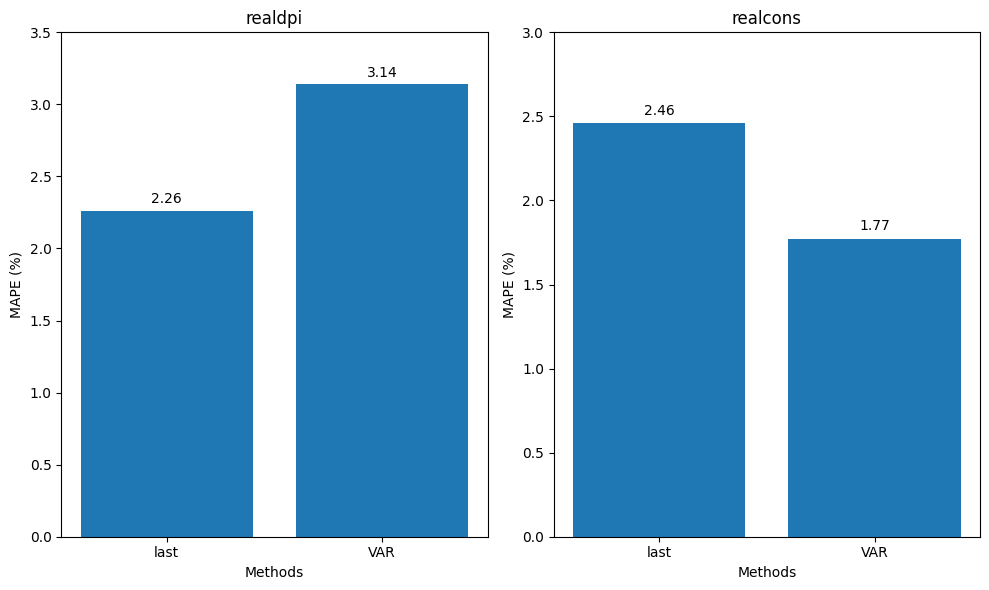

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

x = ['last', 'VAR']
y1 = [mape_realdpi_last, mape_realdpi_VAR]
y2 = [mape_realcons_last, mape_realcons_VAR]

ax1.bar(x, y1)
ax1.set_xlabel('Methods')
ax1.set_ylabel('MAPE (%)')
ax1.set_title('realdpi')
ax1.set_ylim(0, 3.5)

ax2.bar(x,y2)
ax2.set_xlabel('Methods')
ax2.set_ylabel('MAPE (%)')
ax2.set_title('realcons')
ax2.set_ylim(0, 3)

for index, value in enumerate(y1):
    ax1.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')

for index, value in enumerate(y2):
    ax2.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')

plt.tight_layout()

We can hypothesize that in the case of realdpi, realcons is not predictive enough
to make more accurate forecasts than the baseline, even though the Granger causality
test passed. Therefore, we should resort to using a variation of the SARIMAX model to
predict realdpi. Thus, I would conclude that the VAR(3) model is not sufficient to
accurately forecast realdpi and realcons. I would suggest using two separate models,
which could include realdpi and realcons as exogenous variables, while also potentially
including moving average terms.